In [3]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

pd.options.display.max_columns = None  # 길어서 생략된 열 다 보이게 하기
# pd.options.display.max_rows = None

In [4]:
events1= pd.read_parquet('/Users/hj/Documents/Four-A/dataset/Looker Ecommerce BigQuery Dataset/Optimization/events_optimized_divided1.parquet')
events2= pd.read_parquet('/Users/hj/Documents/Four-A/dataset/Looker Ecommerce BigQuery Dataset/Optimization/events_optimized_divided2.parquet')
events = pd.concat([events1, events2]).sort_index()
events.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/hj/Documents/Four-A/dataset/Looker Ecommerce BigQuery Dataset/Optimization/events_optimized_divided1.parquet'

In [ ]:
events = events[events['event_created_at']<"2023-12-01"]
events.head()

,event_id,user_id,sequence_number,session_id,event_created_at,ip_address,city,state,postal_code,browser,event_traffic_source,uri,event_type
0,2198523,<NA>,3,83889ed2-2adc-4b9a-af5d-154f6998e778,2021-06-17 17:30:00+00:00,138.143.9.202,São Paulo,São Paulo,02675-031,Chrome,Adwords,/cancel,cancel
1,1773216,<NA>,3,7a3fc3f2-e84f-44fe-8876-eff76741f7a3,2020-08-07 08:41:00+00:00,85.114.141.79,Santa Isabel,São Paulo,07500-000,Safari,Adwords,/cancel,cancel
2,2380515,<NA>,3,13d9b2fb-eee1-43fd-965c-267b38dd7125,2021-02-15 18:48:00+00:00,169.250.255.132,Mairiporã,São Paulo,07600-000,IE,Adwords,/cancel,cancel
3,2250597,<NA>,3,96f1d44e-9621-463c-954c-d8deb7fffe7f,2022-03-30 10:56:00+00:00,137.25.222.160,Cajamar,São Paulo,07750-000,Chrome,Adwords,/cancel,cancel
4,1834446,<NA>,3,d09dce10-a7cb-47d3-a9af-44975566fa03,2019-09-05 01:18:00+00:00,161.114.4.174,São Paulo,São Paulo,09581-680,Chrome,Email,/cancel,cancel


In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2220767 entries, 0 to 2431962
Data columns (total 13 columns):
 #   Column                Dtype              
---  ------                -----              
 0   event_id              Int32              
 1   user_id               Int32              
 2   sequence_number       Int8               
 3   session_id            object             
 4   event_created_at      datetime64[ns, UTC]
 5   ip_address            object             
 6   city                  category           
 7   state                 category           
 8   postal_code           object             
 9   browser               category           
 10  event_traffic_source  category           
 11  uri                   object             
 12  event_type            category           
dtypes: Int32(2), Int8(1), category(5), datetime64[ns, UTC](1), object(4)
memory usage: 142.2+ MB


In [ ]:
events.isnull().sum()

event_id                      0
user_id                 1096789
sequence_number               0
session_id                    0
event_created_at              0
ip_address                    0
city                      20733
state                         0
postal_code                   0
browser                       0
event_traffic_source          0
uri                           0
event_type                    0
dtype: int64

In [ ]:
events['year'] = events['event_created_at'].dt.year
events['month'] = events['event_created_at'].dt.month
events['day'] = events['event_created_at'].dt.day
events['date'] = pd.to_datetime(events['event_created_at']).dt.date
events.head()

,event_id,user_id,sequence_number,session_id,event_created_at,ip_address,city,state,postal_code,browser,event_traffic_source,uri,event_type,year,month,day,date
0,2198523,<NA>,3,83889ed2-2adc-4b9a-af5d-154f6998e778,2021-06-17 17:30:00+00:00,138.143.9.202,São Paulo,São Paulo,02675-031,Chrome,Adwords,/cancel,cancel,2021,6,17,2021-06-17
1,1773216,<NA>,3,7a3fc3f2-e84f-44fe-8876-eff76741f7a3,2020-08-07 08:41:00+00:00,85.114.141.79,Santa Isabel,São Paulo,07500-000,Safari,Adwords,/cancel,cancel,2020,8,7,2020-08-07
2,2380515,<NA>,3,13d9b2fb-eee1-43fd-965c-267b38dd7125,2021-02-15 18:48:00+00:00,169.250.255.132,Mairiporã,São Paulo,07600-000,IE,Adwords,/cancel,cancel,2021,2,15,2021-02-15
3,2250597,<NA>,3,96f1d44e-9621-463c-954c-d8deb7fffe7f,2022-03-30 10:56:00+00:00,137.25.222.160,Cajamar,São Paulo,07750-000,Chrome,Adwords,/cancel,cancel,2022,3,30,2022-03-30
4,1834446,<NA>,3,d09dce10-a7cb-47d3-a9af-44975566fa03,2019-09-05 01:18:00+00:00,161.114.4.174,São Paulo,São Paulo,09581-680,Chrome,Email,/cancel,cancel,2019,9,5,2019-09-05


In [ ]:
# 월별 유저 행동 카운트 
"""
-> 보기만 하고 안산 유저
-> 고객 구매까지의 여정이 짧음 
"""

pd.DataFrame(events['month'].value_counts())

,count
month,
11,223860
10,220725
9,202876
8,201212
7,196633
5,185615
6,182695
3,173776
4,171811


In [ ]:
# 월별 사용자 이용수  (유니크 id)

unique_user_counts = events.groupby('month')['user_id'].nunique()
unique_user_counts.sort_values()

month
12     6340
2      6353
1      6837
3      7513
4      7666
5      8393
6      8674
7      9459
8     10007
9     10409
10    11559
11    12356
Name: user_id, dtype: int64

## DAU (일간 활성 사용자수) 추이

In [ ]:
dau = events.groupby('date')[['user_id']].nunique().reset_index().rename({'user_id':'dau'}, axis=1)
dau

,date,dau
0,2019-01-02,0
1,2019-01-03,0
2,2019-01-04,0
3,2019-01-05,0
4,2019-01-06,1
...,...,...
1789,2023-11-26,388
1790,2023-11-27,361
1791,2023-11-28,357
1792,2023-11-29,364


In [ ]:
fig = px.line(data_frame = dau, x='date', y='dau', title='DAU 추이')
fig.show()

In [ ]:
dau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1794 entries, 0 to 1793
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1794 non-null   object
 1   dau     1794 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 28.2+ KB


In [ ]:
dau['date'] = pd.to_datetime(dau['date'])

dau['day_of_week'] = dau['date'].dt.day_name()
dau['day_of_week1'] = dau['date'].dt.day_of_week
dau

,date,dau,day_of_week,day_of_week1
0,2019-01-02,0,Wednesday,2
1,2019-01-03,0,Thursday,3
2,2019-01-04,0,Friday,4
3,2019-01-05,0,Saturday,5
4,2019-01-06,1,Sunday,6
...,...,...,...,...
1789,2023-11-26,388,Sunday,6
1790,2023-11-27,361,Monday,0
1791,2023-11-28,357,Tuesday,1
1792,2023-11-29,364,Wednesday,2


In [ ]:
## 요일별 DAU 

avg_dau_by_dow = dau.groupby(['day_of_week', 'day_of_week1'])[['dau']].mean().reset_index()
avg_dau_by_dow.sort_values('day_of_week1', inplace=True)
avg_dau_by_dow

,day_of_week,day_of_week1,dau
1,Monday,0,91.718750
5,Tuesday,1,92.070312
6,Wednesday,2,91.964981
4,Thursday,3,92.509728
0,Friday,4,91.066406
2,Saturday,5,91.187500
3,Sunday,6,92.191406


In [ ]:
fig = px.bar(data_frame=avg_dau_by_dow, x='day_of_week', y='dau', title='요일별 DAU 평균', width=700, height=500)
fig.show()

## 사이트 체류시간 평균

In [ ]:
events.head()

,event_id,user_id,sequence_number,session_id,event_created_at,ip_address,city,state,postal_code,browser,event_traffic_source,uri,event_type,year,month,day,date
0,2198523,<NA>,3,83889ed2-2adc-4b9a-af5d-154f6998e778,2021-06-17 17:30:00+00:00,138.143.9.202,São Paulo,São Paulo,02675-031,Chrome,Adwords,/cancel,cancel,2021,6,17,2021-06-17
1,1773216,<NA>,3,7a3fc3f2-e84f-44fe-8876-eff76741f7a3,2020-08-07 08:41:00+00:00,85.114.141.79,Santa Isabel,São Paulo,07500-000,Safari,Adwords,/cancel,cancel,2020,8,7,2020-08-07
2,2380515,<NA>,3,13d9b2fb-eee1-43fd-965c-267b38dd7125,2021-02-15 18:48:00+00:00,169.250.255.132,Mairiporã,São Paulo,07600-000,IE,Adwords,/cancel,cancel,2021,2,15,2021-02-15
3,2250597,<NA>,3,96f1d44e-9621-463c-954c-d8deb7fffe7f,2022-03-30 10:56:00+00:00,137.25.222.160,Cajamar,São Paulo,07750-000,Chrome,Adwords,/cancel,cancel,2022,3,30,2022-03-30
4,1834446,<NA>,3,d09dce10-a7cb-47d3-a9af-44975566fa03,2019-09-05 01:18:00+00:00,161.114.4.174,São Paulo,São Paulo,09581-680,Chrome,Email,/cancel,cancel,2019,9,5,2019-09-05


In [ ]:
events.query('session_id == "83889ed2-2adc-4b9a-af5d-154f6998e778"').sort_values('event_created_at')

,event_id,user_id,sequence_number,session_id,event_created_at,ip_address,city,state,postal_code,browser,event_traffic_source,uri,event_type,year,month,day,date
1380245,2198521,<NA>,1,83889ed2-2adc-4b9a-af5d-154f6998e778,2021-06-17 17:10:00+00:00,138.143.9.202,São Paulo,São Paulo,02675-031,Chrome,Adwords,/product/16375,product,2021,6,17,2021-06-17
2259680,2198522,<NA>,2,83889ed2-2adc-4b9a-af5d-154f6998e778,2021-06-17 17:24:00+00:00,138.143.9.202,São Paulo,São Paulo,02675-031,Chrome,Adwords,/cart,cart,2021,6,17,2021-06-17
0,2198523,<NA>,3,83889ed2-2adc-4b9a-af5d-154f6998e778,2021-06-17 17:30:00+00:00,138.143.9.202,São Paulo,São Paulo,02675-031,Chrome,Adwords,/cancel,cancel,2021,6,17,2021-06-17


In [ ]:
events[(events['event_id'] >= 2198524) & (events['event_id'] < 2198535)].sort_values('event_id')

,event_id,user_id,sequence_number,session_id,event_created_at,ip_address,city,state,postal_code,browser,event_traffic_source,uri,event_type,year,month,day,date
1135697,2198524,<NA>,1,8ecb870d-9f42-4967-a2be-27bb91d1b90f,2023-11-09 11:24:00+00:00,177.193.218.240,Osterode am Harz,Niedersachsen,37520,Chrome,YouTube,/product/3411,product,2023,11,9,2023-11-09
1121431,2198525,<NA>,2,8ecb870d-9f42-4967-a2be-27bb91d1b90f,2023-11-09 11:38:00+00:00,177.193.218.240,Osterode am Harz,Niedersachsen,37520,Chrome,YouTube,/cart,cart,2023,11,9,2023-11-09
1663869,2198526,<NA>,3,8ecb870d-9f42-4967-a2be-27bb91d1b90f,2023-11-09 12:06:00+00:00,177.193.218.240,Osterode am Harz,Niedersachsen,37520,Chrome,YouTube,/cancel,cancel,2023,11,9,2023-11-09
1948667,2198527,<NA>,1,f4e27ea2-9d78-41ed-a12d-b671324efbec,2021-10-28 14:43:00+00:00,111.193.61.121,San Tan Valley,Arizona,85140,Firefox,Organic,/department/women/category/leggings/brand/luxu...,department,2021,10,28,2021-10-28
1015576,2198528,<NA>,2,f4e27ea2-9d78-41ed-a12d-b671324efbec,2021-10-28 14:43:00+00:00,111.193.61.121,San Tan Valley,Arizona,85140,Firefox,Organic,/product/5793,product,2021,10,28,2021-10-28
2249001,2198529,<NA>,1,9fd8f1f7-caae-4e48-945e-848cffc30735,2019-10-07 16:07:00+00:00,72.76.190.217,National city,Tokyo,186-0004,Other,Adwords,/product/18065,product,2019,10,7,2019-10-07
662528,2198530,<NA>,1,f5911105-38c1-404a-a8ba-f1697eb21eac,2021-01-12 15:57:00+00:00,81.213.8.124,Decatur,Georgia,30030,Firefox,Email,/product/26836,product,2021,1,12,2021-01-12
633922,2198531,<NA>,1,f823b8c9-7e79-4249-a5fe-2666e9433b81,2021-11-28 07:58:00+00:00,34.139.123.246,Chula Vista,California,91913,Safari,Facebook,/department/men/category/suits&sportcoats/bran...,department,2021,11,28,2021-11-28
244674,2198532,<NA>,2,f823b8c9-7e79-4249-a5fe-2666e9433b81,2021-11-28 08:22:00+00:00,34.139.123.246,Chula Vista,California,91913,Safari,Facebook,/product/20453,product,2021,11,28,2021-11-28
876574,2198533,<NA>,3,f823b8c9-7e79-4249-a5fe-2666e9433b81,2021-11-28 08:50:00+00:00,34.139.123.246,Chula Vista,California,91913,Safari,Facebook,/cart,cart,2021,11,28,2021-11-28


In [ ]:
print(events.query('session_id == "959d7ba8-e279-4581-97ce-bc8ef6d754db"')['event_created_at'].max())
print(events.query('session_id == "959d7ba8-e279-4581-97ce-bc8ef6d754db"')['event_created_at'].min())
print(events.query('session_id == "959d7ba8-e279-4581-97ce-bc8ef6d754db"')['event_created_at'].max() - events.query('session_id == "959d7ba8-e279-4581-97ce-bc8ef6d754db"')['event_created_at'].min())


2022-04-07 05:50:49+00:00
2022-04-07 05:45:12+00:00
0 days 00:05:37


In [ ]:
duration = events.groupby('session_id')[['event_created_at']].agg(['max', 'min']).reset_index()
duration['duration'] = duration['event_created_at']['max'] - duration['event_created_at']['min']

In [ ]:
duration.columns = ['session_id', 'max', 'min', 'duration']
duration

,session_id,max,min,duration
0,00000763-a855-4ad0-a95c-b160e749b272,2021-10-01 03:52:00+00:00,2021-10-01 03:26:00+00:00,0 days 00:26:00
1,0000364a-ce41-46f1-89d6-3f8704af77db,2022-08-22 10:52:42+00:00,2022-08-22 10:46:40+00:00,0 days 00:06:02
2,00004b15-f2d4-4687-b4c1-fc9ce336d39a,2022-06-11 01:54:00+00:00,2022-06-11 01:28:00+00:00,0 days 00:26:00
3,00004cf0-0d54-4347-8b0c-dccc700a2c96,2021-12-28 03:32:00+00:00,2021-12-28 03:11:00+00:00,0 days 00:21:00
4,00005f74-03cb-40ed-b254-364c38c79104,2019-08-02 14:49:00+00:00,2019-08-02 14:40:00+00:00,0 days 00:09:00
...,...,...,...,...
643588,ffff7645-26f7-410f-8498-0c601d74c67a,2019-11-05 15:39:00+00:00,2019-11-05 15:00:00+00:00,0 days 00:39:00
643589,ffff8086-da2c-4045-94ba-453437cd3289,2020-03-20 06:06:00+00:00,2020-03-20 06:06:00+00:00,0 days 00:00:00
643590,ffffa9aa-4345-4c2a-b389-8fd58844472e,2021-07-26 15:49:00+00:00,2021-07-26 15:45:00+00:00,0 days 00:04:00
643591,ffffc3b7-9bc3-44d0-935e-cfaf11c91a0e,2019-07-10 07:21:00+00:00,2019-07-10 07:02:00+00:00,0 days 00:19:00


- 각 세션의 최대 sequence_number 계산

In [ ]:
max_sequence = events.groupby('session_id')['sequence_number'].max().reset_index()

duration = pd.merge(duration, max_sequence, on='session_id', how='left')
duration.rename(columns={'sequence_number': 'max_sequence_number'}, inplace=True)
duration

,session_id,max,min,duration,max_sequence_number
0,00000763-a855-4ad0-a95c-b160e749b272,2021-10-01 03:52:00+00:00,2021-10-01 03:26:00+00:00,0 days 00:26:00,3
1,0000364a-ce41-46f1-89d6-3f8704af77db,2022-08-22 10:52:42+00:00,2022-08-22 10:46:40+00:00,0 days 00:06:02,5
2,00004b15-f2d4-4687-b4c1-fc9ce336d39a,2022-06-11 01:54:00+00:00,2022-06-11 01:28:00+00:00,0 days 00:26:00,3
3,00004cf0-0d54-4347-8b0c-dccc700a2c96,2021-12-28 03:32:00+00:00,2021-12-28 03:11:00+00:00,0 days 00:21:00,3
4,00005f74-03cb-40ed-b254-364c38c79104,2019-08-02 14:49:00+00:00,2019-08-02 14:40:00+00:00,0 days 00:09:00,2
...,...,...,...,...,...
643588,ffff7645-26f7-410f-8498-0c601d74c67a,2019-11-05 15:39:00+00:00,2019-11-05 15:00:00+00:00,0 days 00:39:00,3
643589,ffff8086-da2c-4045-94ba-453437cd3289,2020-03-20 06:06:00+00:00,2020-03-20 06:06:00+00:00,0 days 00:00:00,1
643590,ffffa9aa-4345-4c2a-b389-8fd58844472e,2021-07-26 15:49:00+00:00,2021-07-26 15:45:00+00:00,0 days 00:04:00,2
643591,ffffc3b7-9bc3-44d0-935e-cfaf11c91a0e,2019-07-10 07:21:00+00:00,2019-07-10 07:02:00+00:00,0 days 00:19:00,3


- 체류시간 평균

In [ ]:
duration['duration'].mean()

Timedelta('0 days 06:16:15.696093649')

- session_number 평균

In [ ]:
duration['max_sequence_number'].mean()

3.450576684333111

- sequence number max값의 event_type 확인

In [ ]:
max_sequence_events = events.loc[events.groupby('session_id')['sequence_number'].idxmax()]

print(max_sequence_events[['session_id', 'event_type']])

max_sequence_events['event_type'].value_counts()

                                   session_id event_type
1298355  00000763-a855-4ad0-a95c-b160e749b272       cart
2108537  0000364a-ce41-46f1-89d6-3f8704af77db   purchase
1642387  00004b15-f2d4-4687-b4c1-fc9ce336d39a       cart
1790395  00004cf0-0d54-4347-8b0c-dccc700a2c96       cart
46442    00005f74-03cb-40ed-b254-364c38c79104    product
...                                       ...        ...
2061241  ffff7645-26f7-410f-8498-0c601d74c67a     cancel
1685629  ffff8086-da2c-4045-94ba-453437cd3289    product
840803   ffffa9aa-4345-4c2a-b389-8fd58844472e    product
125555   ffffc3b7-9bc3-44d0-935e-cfaf11c91a0e       cart
769437   ffffc96a-b665-41a1-8a9a-1101c46e6620   purchase

[643593 rows x 2 columns]


event_type
product       243117
purchase      156083
cancel        122387
cart          122004
department         1
home               1
Name: count, dtype: int64

### 조회만 한 유저, 카트에 담은 유저, 구매까지 한 유저 별 체류 시간 비교

In [ ]:
session_pivot = pd.pivot_table(data=events, index='session_id', columns='event_type', values='event_created_at', aggfunc='count').reset_index().fillna(0)
session_pivot

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_3187/745961524.py:1: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



event_type,session_id,cancel,cart,department,home,product,purchase
0,00000763-a855-4ad0-a95c-b160e749b272,0,1,1,0,1,0
1,0000364a-ce41-46f1-89d6-3f8704af77db,0,1,1,1,1,1
2,00004b15-f2d4-4687-b4c1-fc9ce336d39a,0,1,1,0,1,0
3,00004cf0-0d54-4347-8b0c-dccc700a2c96,0,1,1,0,1,0
4,00005f74-03cb-40ed-b254-364c38c79104,0,0,1,0,1,0
...,...,...,...,...,...,...,...
643588,ffff7645-26f7-410f-8498-0c601d74c67a,1,1,0,0,1,0
643589,ffff8086-da2c-4045-94ba-453437cd3289,0,0,0,0,1,0
643590,ffffa9aa-4345-4c2a-b389-8fd58844472e,0,0,1,0,1,0
643591,ffffc3b7-9bc3-44d0-935e-cfaf11c91a0e,0,1,1,0,1,0


In [ ]:
max_purchase = session_pivot['purchase'].max()
max_department = session_pivot['department'].max()
max_product = session_pivot['product'].max()
max_cart = session_pivot['cart'].max()

print("purchase 열의 최대값:", max_purchase)
print("department 열의 최대값", max_department)
print("max_product 열의 최대값", max_product)
print("max_cart 열의 최대값", max_cart)

purchase 열의 최대값: 1
department 열의 최대값 4
max_product 열의 최대값 4
max_cart 열의 최대값 4


In [ ]:
cart_session = list(session_pivot.query('cart > 0')['session_id'])
purchased_session = list(session_pivot.query('purchase > 0')['session_id'])

In [ ]:
view_session_avg_duration = duration.query('session_id not in @cart_session and session_id not in @purchased_session')['duration'].mean()
cart_session_avg_duration = duration.query('session_id in @cart_session')['duration'].mean()
purchased_session_avg_duration = duration.query('session_id in @purchased_session')['duration'].mean()

print(f"조회만 한 유저의 평균 체류시간 : {view_session_avg_duration}")
print(f"카트에 담은 유저의 평균 체류시간 : {cart_session_avg_duration}")
print(f"구매까지 한 유저의 평균 체류시간 : {purchased_session_avg_duration}")

조회만 한 유저의 평균 체류시간 : 0 days 00:07:15.212859599
카트에 담은 유저의 평균 체류시간 : 0 days 10:00:16.610015606
구매까지 한 유저의 평균 체류시간 : 1 days 00:54:43.280229108


### duration 이 높을수록 구매할 확률이 높아지는가?

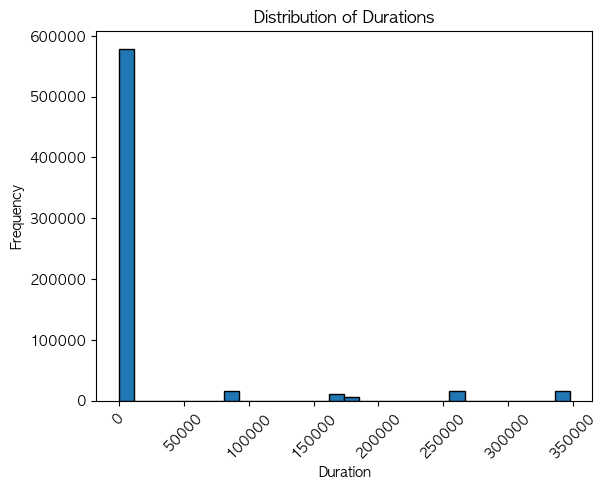

In [ ]:
# 시간 간격을 초로 변환
duration['duration_seconds'] = duration['duration'].dt.total_seconds()

plt.hist(duration['duration_seconds'], bins=30, edgecolor='black')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Durations')
plt.xticks(rotation=45)
plt.show()

In [ ]:
duration_row = duration[duration['duration_seconds']<50000] # 13시간 
# duration_row = duration[(duration['duration_seconds']>50000) & (duration['duration_seconds']<100000)]
duration_row

,session_id,max,min,duration,max_sequence_number,duration_category,duration_seconds
0,00000763-a855-4ad0-a95c-b160e749b272,2021-10-01 03:52:00+00:00,2021-10-01 03:26:00+00:00,0 days 00:26:00,3,Medium,1560.0
1,0000364a-ce41-46f1-89d6-3f8704af77db,2022-08-22 10:52:42+00:00,2022-08-22 10:46:40+00:00,0 days 00:06:02,5,Short,362.0
2,00004b15-f2d4-4687-b4c1-fc9ce336d39a,2022-06-11 01:54:00+00:00,2022-06-11 01:28:00+00:00,0 days 00:26:00,3,Medium,1560.0
3,00004cf0-0d54-4347-8b0c-dccc700a2c96,2021-12-28 03:32:00+00:00,2021-12-28 03:11:00+00:00,0 days 00:21:00,3,Medium,1260.0
4,00005f74-03cb-40ed-b254-364c38c79104,2019-08-02 14:49:00+00:00,2019-08-02 14:40:00+00:00,0 days 00:09:00,2,Short,540.0
...,...,...,...,...,...,...,...
643587,ffff532c-4e82-41fd-8c7d-ddefa871b5eb,2023-08-07 05:38:00+00:00,2023-08-07 05:25:00+00:00,0 days 00:13:00,2,Short,780.0
643588,ffff7645-26f7-410f-8498-0c601d74c67a,2019-11-05 15:39:00+00:00,2019-11-05 15:00:00+00:00,0 days 00:39:00,3,Medium,2340.0
643589,ffff8086-da2c-4045-94ba-453437cd3289,2020-03-20 06:06:00+00:00,2020-03-20 06:06:00+00:00,0 days 00:00:00,1,Short,0.0
643590,ffffa9aa-4345-4c2a-b389-8fd58844472e,2021-07-26 15:49:00+00:00,2021-07-26 15:45:00+00:00,0 days 00:04:00,2,Short,240.0


In [ ]:
duration_row['duration_seconds'].max()

3480.0

(array([131017.,  18395.,  37686.,  42234.,  27573.,  18278.,  17337.,
         18133.,  19205.,  19673.,  20764.,  21169.,  22176.,  23137.,
         11788.,  19816.,  14877.,  13952.,  12719.,  11796.,  10597.,
          9448.,   8486.,   7347.,   6400.,   5256.,   4039.,   2957.,
          1978.,    823.]),
 array([   0.,  116.,  232.,  348.,  464.,  580.,  696.,  812.,  928.,
        1044., 1160., 1276., 1392., 1508., 1624., 1740., 1856., 1972.,
        2088., 2204., 2320., 2436., 2552., 2668., 2784., 2900., 3016.,
        3132., 3248., 3364., 3480.]),
 <BarContainer object of 30 artists>)

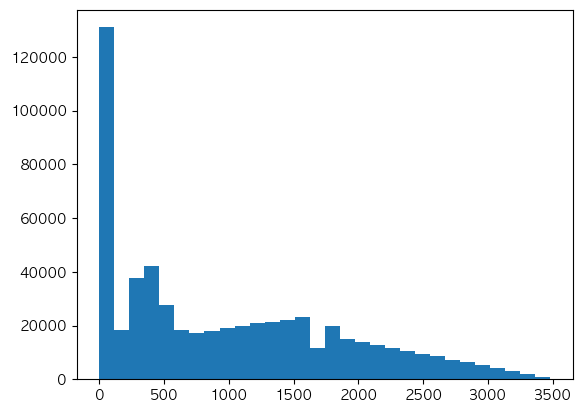

In [ ]:
plt.hist(duration_row['duration_seconds'], bins=30)

In [ ]:
a1= np.percentile(duration_row['duration_seconds'], 50)
a1

780.0

In [ ]:
def categorize_duration(duration_seconds):
    if duration_seconds <= 780:  ## 13분
        return 'Short'
    elif duration_seconds <= 3480:  ## 58분
        return 'Medium'
    else:
        return 'Long'

# duration을 범주화하여 새로운 컬럼 추가
duration['duration_category'] = duration['duration_seconds'].apply(categorize_duration)

duration

,session_id,max,min,duration,max_sequence_number,duration_category,duration_seconds
0,00000763-a855-4ad0-a95c-b160e749b272,2021-10-01 03:52:00+00:00,2021-10-01 03:26:00+00:00,0 days 00:26:00,3,Medium,1560.0
1,0000364a-ce41-46f1-89d6-3f8704af77db,2022-08-22 10:52:42+00:00,2022-08-22 10:46:40+00:00,0 days 00:06:02,5,Short,362.0
2,00004b15-f2d4-4687-b4c1-fc9ce336d39a,2022-06-11 01:54:00+00:00,2022-06-11 01:28:00+00:00,0 days 00:26:00,3,Medium,1560.0
3,00004cf0-0d54-4347-8b0c-dccc700a2c96,2021-12-28 03:32:00+00:00,2021-12-28 03:11:00+00:00,0 days 00:21:00,3,Medium,1260.0
4,00005f74-03cb-40ed-b254-364c38c79104,2019-08-02 14:49:00+00:00,2019-08-02 14:40:00+00:00,0 days 00:09:00,2,Short,540.0
...,...,...,...,...,...,...,...
643588,ffff7645-26f7-410f-8498-0c601d74c67a,2019-11-05 15:39:00+00:00,2019-11-05 15:00:00+00:00,0 days 00:39:00,3,Medium,2340.0
643589,ffff8086-da2c-4045-94ba-453437cd3289,2020-03-20 06:06:00+00:00,2020-03-20 06:06:00+00:00,0 days 00:00:00,1,Short,0.0
643590,ffffa9aa-4345-4c2a-b389-8fd58844472e,2021-07-26 15:49:00+00:00,2021-07-26 15:45:00+00:00,0 days 00:04:00,2,Short,240.0
643591,ffffc3b7-9bc3-44d0-935e-cfaf11c91a0e,2019-07-10 07:21:00+00:00,2019-07-10 07:02:00+00:00,0 days 00:19:00,3,Medium,1140.0


In [ ]:
duration['duration_category'].value_counts()

duration_category
Short     292079
Medium    286977
Long       64537
Name: count, dtype: int64

In [ ]:
# session_id를 기준으로 각 session의 최대 sequence_number를 찾습니다.
max_sequence_number = duration.groupby('session_id')['max_sequence_number'].max()

# 구매한 session의 session_id와 해당 session의 구매 여부를 찾습니다.
purchase_session_ids = events[events['event_type'] == 'purchase']['session_id'].unique()
session_purchase = pd.DataFrame({'session_id': purchase_session_ids, 'purchase': 1})

# duration과 구매 여부를 merge합니다.
merged_data = duration.merge(max_sequence_number, on='session_id').merge(session_purchase, on='session_id', how='left')
merged_data['purchase'].fillna(0, inplace=True)

# duration_category별로 구매 확률을 계산합니다.
purchase_probability_by_duration = merged_data.groupby('duration_category')['purchase'].mean()
print(purchase_probability_by_duration)

duration_category
Long      1.000000
Medium    0.021671
Short     0.292137
Name: purchase, dtype: float64


/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_3187/2894684365.py:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





1. 구매여정이 짧은 집단 (<=13min)
- 사이트를 빠르게 탐색하거나 특정 상품을 찾아보는 세션이었을 것임
- 사용자가 사이트에 더 오래 머무를 수 있도록 유도해야함
    - 시각적 요소 강화
    - 개인화된 추천(사용자의 관심사나 이전 구매 이력을 바탕으로 관심을 가질만한 상품 노출시키기)
    - 할인 및 프로모션 제공 (오늘 밤 12시까지 구매시 00% 할인 과 같은 문구)
    - 고객이 빠르게 구매 결정을 내릴 수 있도록 유도 전략 (실시간 채팅 지원, FAQ 확장)

2. 구매여정이 보통인 집단 (14min~58min)
- 이것 저것 카테고리를 탐색하고 어쩌면 장바구니까지 담겼을지도 모르나, 우리 상품과 연관된 다른 플랫폼과의 가격 비교, 리뷰 등을 비교하다가 다른 플랫폼으로 구매를 빼앗긴 집단(구매전환율이 2%)
- 우리 플랫폼에서 구매해야하는 이유를 만들어 줄 필요가 있어보임
    - 자세한 상품정보 제공 (제품설명, 사양, 리뷰 등)
    - 사용자 경험 개선 (사용자가 원하는 정보를 빠르게 찾을 수 있도록함. 검색, 필터링 옵션, 관련 상품 추천 등)
    - 할인 및 프로모션
    - 장바구니 유도

3. 구매여정이 긴 집단 (1일 41분 이상)
- 구매여정이 긴 집단의 session_id의 min<->max 값이 하루 이상인걸 보았을때, 해당 고객들은 우리 이커머스 뿐만 아니라 다른 정보까지 탐색하다 고민끝에 우리 커머스로 구매를 결정한 집단
- 코로나19 팬데믹 이후 소비자들의 온라인 쇼핑 행동이 더 복잡해지고 길어졌으며 구매 여정이 길어짐에 따라 구매전환율이 높아진 것이라 볼 수 있음
- 고객 충성도가 높음 (우리 회사에 대한 신뢰도와 만족도가 높아 구매 결정을 내렸을 수도 있음)
- 혹은 구매하려던 아이템의 단가가 고가의 제품인 경우에도 신중하게 구매하려는 마음 반영

> 리타게팅 및 리마케팅 전략
- medium / long 집단 대상
- 방문자가 사이트를 떠난 후에도 특정 제품과 서비스에 대한 광고를 볼 수 있도록 함
- 고객이 관심을 보였더 제품이나 카테고리에 대한 맞춤형 푸시/이메일을 보내 구매 유도

### sequence number 가 높을 수록 구매할 확률이 높은가?

In [ ]:
duration

,session_id,max,min,duration,max_sequence_number,duration_category,duration_seconds
0,00000763-a855-4ad0-a95c-b160e749b272,2021-10-01 03:52:00+00:00,2021-10-01 03:26:00+00:00,0 days 00:26:00,3,Medium,1560.0
1,0000364a-ce41-46f1-89d6-3f8704af77db,2022-08-22 10:52:42+00:00,2022-08-22 10:46:40+00:00,0 days 00:06:02,5,Short,362.0
2,00004b15-f2d4-4687-b4c1-fc9ce336d39a,2022-06-11 01:54:00+00:00,2022-06-11 01:28:00+00:00,0 days 00:26:00,3,Medium,1560.0
3,00004cf0-0d54-4347-8b0c-dccc700a2c96,2021-12-28 03:32:00+00:00,2021-12-28 03:11:00+00:00,0 days 00:21:00,3,Medium,1260.0
4,00005f74-03cb-40ed-b254-364c38c79104,2019-08-02 14:49:00+00:00,2019-08-02 14:40:00+00:00,0 days 00:09:00,2,Short,540.0
...,...,...,...,...,...,...,...
643588,ffff7645-26f7-410f-8498-0c601d74c67a,2019-11-05 15:39:00+00:00,2019-11-05 15:00:00+00:00,0 days 00:39:00,3,Medium,2340.0
643589,ffff8086-da2c-4045-94ba-453437cd3289,2020-03-20 06:06:00+00:00,2020-03-20 06:06:00+00:00,0 days 00:00:00,1,Short,0.0
643590,ffffa9aa-4345-4c2a-b389-8fd58844472e,2021-07-26 15:49:00+00:00,2021-07-26 15:45:00+00:00,0 days 00:04:00,2,Short,240.0
643591,ffffc3b7-9bc3-44d0-935e-cfaf11c91a0e,2019-07-10 07:21:00+00:00,2019-07-10 07:02:00+00:00,0 days 00:19:00,3,Medium,1140.0


(array([1.21506e+05, 1.21612e+05, 0.00000e+00, 2.44021e+05, 0.00000e+00,
        0.00000e+00, 7.54410e+04, 0.00000e+00, 1.85000e+02, 0.00000e+00,
        4.27090e+04, 0.00000e+00, 0.00000e+00, 7.70000e+01, 0.00000e+00,
        1.61450e+04, 0.00000e+00, 0.00000e+00, 1.08000e+02, 2.17890e+04]),
 array([ 1. ,  1.6,  2.2,  2.8,  3.4,  4. ,  4.6,  5.2,  5.8,  6.4,  7. ,
         7.6,  8.2,  8.8,  9.4, 10. , 10.6, 11.2, 11.8, 12.4, 13. ]),
 <BarContainer object of 20 artists>)

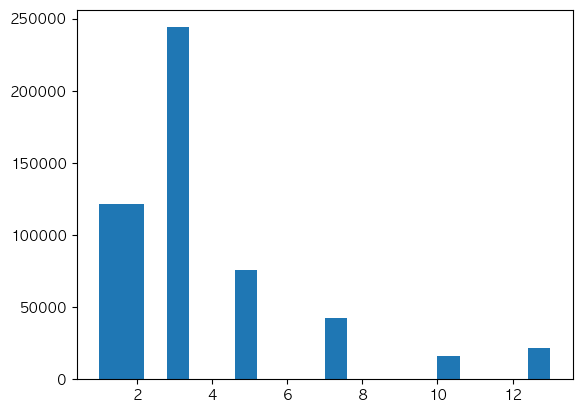

In [ ]:
plt.hist(duration['max_sequence_number'],bins=20)

In [ ]:
b1, b2= np.percentile(duration['max_sequence_number'], [50,90])
b1, b2

(3.0, 7.0)

In [ ]:
def categorize_maxsequence(max_sequence_number):
    if max_sequence_number <= 3:  ## 
        return 'light'
    elif max_sequence_number <= 7:  ## 
        return 'middle'
    else:
        return 'heavy'

# duration을 범주화하여 새로운 컬럼 추가
duration['sequence_category'] = duration['max_sequence_number'].apply(categorize_maxsequence)

duration

,session_id,max,min,duration,max_sequence_number,duration_category,duration_seconds,sequence_category
0,00000763-a855-4ad0-a95c-b160e749b272,2021-10-01 03:52:00+00:00,2021-10-01 03:26:00+00:00,0 days 00:26:00,3,Medium,1560.0,light
1,0000364a-ce41-46f1-89d6-3f8704af77db,2022-08-22 10:52:42+00:00,2022-08-22 10:46:40+00:00,0 days 00:06:02,5,Short,362.0,middle
2,00004b15-f2d4-4687-b4c1-fc9ce336d39a,2022-06-11 01:54:00+00:00,2022-06-11 01:28:00+00:00,0 days 00:26:00,3,Medium,1560.0,light
3,00004cf0-0d54-4347-8b0c-dccc700a2c96,2021-12-28 03:32:00+00:00,2021-12-28 03:11:00+00:00,0 days 00:21:00,3,Medium,1260.0,light
4,00005f74-03cb-40ed-b254-364c38c79104,2019-08-02 14:49:00+00:00,2019-08-02 14:40:00+00:00,0 days 00:09:00,2,Short,540.0,light
...,...,...,...,...,...,...,...,...
643588,ffff7645-26f7-410f-8498-0c601d74c67a,2019-11-05 15:39:00+00:00,2019-11-05 15:00:00+00:00,0 days 00:39:00,3,Medium,2340.0,light
643589,ffff8086-da2c-4045-94ba-453437cd3289,2020-03-20 06:06:00+00:00,2020-03-20 06:06:00+00:00,0 days 00:00:00,1,Short,0.0,light
643590,ffffa9aa-4345-4c2a-b389-8fd58844472e,2021-07-26 15:49:00+00:00,2021-07-26 15:45:00+00:00,0 days 00:04:00,2,Short,240.0,light
643591,ffffc3b7-9bc3-44d0-935e-cfaf11c91a0e,2019-07-10 07:21:00+00:00,2019-07-10 07:02:00+00:00,0 days 00:19:00,3,Medium,1140.0,light


In [ ]:
duration['sequence_category'].value_counts()

sequence_category
light     487139
middle    118335
heavy      38119
Name: count, dtype: int64

In [ ]:
# # session_id를 기준으로 각 session의 최대 sequence_number를 찾습니다.
# max_sequence_number = duration.groupby('session_id')['max_sequence_number'].max()

# # 구매한 session의 session_id와 해당 session의 구매 여부를 찾습니다.
# purchase_session_ids = events[events['event_type'] == 'purchase']['session_id'].unique()
# session_purchase = pd.DataFrame({'session_id': purchase_session_ids, 'purchase': 1})

# # duration과 구매 여부를 merge합니다.
# merged_data = duration.merge(max_sequence_number, on='session_id').merge(session_purchase, on='session_id', how='left')
# merged_data['purchase'].fillna(0, inplace=True)

# # duration_category별로 구매 확률을 계산합니다.
# purchase_probability_by_duration = merged_data.groupby('duration_category')['purchase'].mean()
# print(purchase_probability_by_duration)

In [ ]:
merged_data.head()

,session_id,max,min,duration,max_sequence_number_x,duration_category,duration_seconds,max_sequence_number_y,purchase,sequence_category
0,00000763-a855-4ad0-a95c-b160e749b272,2021-10-01 03:52:00+00:00,2021-10-01 03:26:00+00:00,0 days 00:26:00,3,Medium,1560.0,3,0.0,light
1,0000364a-ce41-46f1-89d6-3f8704af77db,2022-08-22 10:52:42+00:00,2022-08-22 10:46:40+00:00,0 days 00:06:02,5,Short,362.0,5,1.0,middle
2,00004b15-f2d4-4687-b4c1-fc9ce336d39a,2022-06-11 01:54:00+00:00,2022-06-11 01:28:00+00:00,0 days 00:26:00,3,Medium,1560.0,3,0.0,light
3,00004cf0-0d54-4347-8b0c-dccc700a2c96,2021-12-28 03:32:00+00:00,2021-12-28 03:11:00+00:00,0 days 00:21:00,3,Medium,1260.0,3,0.0,light
4,00005f74-03cb-40ed-b254-364c38c79104,2019-08-02 14:49:00+00:00,2019-08-02 14:40:00+00:00,0 days 00:09:00,2,Short,540.0,2,0.0,light


In [ ]:
merged_data['sequence_category'] = merged_data['max_sequence_number_x'].apply(categorize_maxsequence)

merged_data.head()

,session_id,max,min,duration,max_sequence_number_x,duration_category,duration_seconds,max_sequence_number_y,purchase,sequence_category
0,00000763-a855-4ad0-a95c-b160e749b272,2021-10-01 03:52:00+00:00,2021-10-01 03:26:00+00:00,0 days 00:26:00,3,Medium,1560.0,3,0.0,light
1,0000364a-ce41-46f1-89d6-3f8704af77db,2022-08-22 10:52:42+00:00,2022-08-22 10:46:40+00:00,0 days 00:06:02,5,Short,362.0,5,1.0,middle
2,00004b15-f2d4-4687-b4c1-fc9ce336d39a,2022-06-11 01:54:00+00:00,2022-06-11 01:28:00+00:00,0 days 00:26:00,3,Medium,1560.0,3,0.0,light
3,00004cf0-0d54-4347-8b0c-dccc700a2c96,2021-12-28 03:32:00+00:00,2021-12-28 03:11:00+00:00,0 days 00:21:00,3,Medium,1260.0,3,0.0,light
4,00005f74-03cb-40ed-b254-364c38c79104,2019-08-02 14:49:00+00:00,2019-08-02 14:40:00+00:00,0 days 00:09:00,2,Short,540.0,2,0.0,light


In [ ]:
purchase_probability_by_sequence = merged_data.groupby('sequence_category')['purchase'].mean()
print(purchase_probability_by_sequence)

sequence_category
heavy     0.995121
light     0.000000
middle    0.998437
Name: purchase, dtype: float64


- sequence number <= 3 인 그룹은 구매율이 0%
- sequence number >= 4 인 그룹 구매율 99%

## 어느 단계에서 유저들이 가장 많이 이탈하나?

In [ ]:
funnel = session_pivot[['home', 'department', 'product','cart', 'cancel', 'purchase']].sum().to_frame().reset_index()
funnel.columns = ['event_type', 'count']
funnel = funnel.query('event_type != "cancel"')
funnel

,event_type,count
0,home,75442
1,department,540730
2,product,784621
3,cart,541504
5,purchase,156083


In [ ]:
fig = px.funnel(data_frame=funnel, x='event_type', y='count', title='Funnel aka 운동기구')
fig.update_traces(texttemplate="%{value:,.0f}")
fig.show()


In [ ]:
sequence_1 = events[events['sequence_number'] == 1]
sequence_1_type = sequence_1.groupby('event_type').size().sort_values(ascending=False)
# events[events['sequence_number'] == 1].groupby('event_type').size().sort_values(ascending=False)
sequence_1_type

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_3187/3536280727.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



event_type
department    324259
product       243892
home           75442
cancel             0
cart               0
purchase           0
dtype: int64

- department와 product는 광고 캠페인에 사용된 랜딩페이지 일 가능성 높음
- 랜딩페이지(온라인 광고를 클릭하면 바로 연결되는 페이지)

In [ ]:
canceled_data= events[events['event_type']=='cancel']
canceled_data

,event_id,user_id,sequence_number,session_id,event_created_at,ip_address,city,state,postal_code,browser,event_traffic_source,uri,event_type,year,month,day,date
0,2198523,<NA>,3,83889ed2-2adc-4b9a-af5d-154f6998e778,2021-06-17 17:30:00+00:00,138.143.9.202,São Paulo,São Paulo,02675-031,Chrome,Adwords,/cancel,cancel,2021,6,17,2021-06-17
1,1773216,<NA>,3,7a3fc3f2-e84f-44fe-8876-eff76741f7a3,2020-08-07 08:41:00+00:00,85.114.141.79,Santa Isabel,São Paulo,07500-000,Safari,Adwords,/cancel,cancel,2020,8,7,2020-08-07
2,2380515,<NA>,3,13d9b2fb-eee1-43fd-965c-267b38dd7125,2021-02-15 18:48:00+00:00,169.250.255.132,Mairiporã,São Paulo,07600-000,IE,Adwords,/cancel,cancel,2021,2,15,2021-02-15
3,2250597,<NA>,3,96f1d44e-9621-463c-954c-d8deb7fffe7f,2022-03-30 10:56:00+00:00,137.25.222.160,Cajamar,São Paulo,07750-000,Chrome,Adwords,/cancel,cancel,2022,3,30,2022-03-30
4,1834446,<NA>,3,d09dce10-a7cb-47d3-a9af-44975566fa03,2019-09-05 01:18:00+00:00,161.114.4.174,São Paulo,São Paulo,09581-680,Chrome,Email,/cancel,cancel,2019,9,5,2019-09-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408413,1773586,<NA>,3,6573bb67-f346-4448-b98f-167fbed8bf52,2023-07-07 12:00:00+00:00,10.29.170.67,London,England,W3,Chrome,Adwords,/cancel,cancel,2023,7,7,2023-07-07
2408415,2219661,<NA>,3,244b19b9-3570-4b0c-bd4d-ca923c157f7f,2020-10-04 17:23:00+00:00,96.30.193.225,Wakefield,England,WF2,Firefox,Email,/cancel,cancel,2020,10,4,2020-10-04
2408416,1521021,<NA>,3,b1d4e0ed-685b-4365-8933-84817ad9730f,2023-03-17 11:18:00+00:00,113.98.116.93,Droitwich Spa,England,WR9,Safari,YouTube,/cancel,cancel,2023,3,17,2023-03-17
2408417,1628856,<NA>,3,0ce673da-fad8-4f2e-b5e1-e9dc4b8c40a4,2021-12-25 17:57:00+00:00,41.128.250.236,Wednesbury,England,WS10,Chrome,Email,/cancel,cancel,2021,12,25,2021-12-25


In [ ]:
canceled_data.isnull().sum()

event_id                     0
user_id                 122387
sequence_number              0
session_id                   0
event_created_at             0
ip_address                   0
city                      1141
state                        0
postal_code                  0
browser                      0
event_traffic_source         0
uri                          0
event_type                   0
year                         0
month                        0
day                          0
date                         0
dtype: int64

In [ ]:
canceled_data[canceled_data['user_id'].notnull()]

,event_id,user_id,sequence_number,session_id,event_created_at,ip_address,city,state,postal_code,browser,event_traffic_source,uri,event_type,year,month,day,date


- cancel되면 id 널값으로 바뀜

In [ ]:
events[events['user_id']==60965].sort_values('event_created_at').head()

,event_id,user_id,sequence_number,session_id,event_created_at,ip_address,city,state,postal_code,browser,event_traffic_source,uri,event_type,year,month,day,date
34285,796443,60965,1,6f04e9b8-eb39-4e45-945f-9a3e4c450de3,2021-07-22 01:38:19+00:00,153.110.10.253,Haines City,Florida,33844,Chrome,Adwords,/department/men/category/fashionhoodies&sweats...,department,2021,7,22,2021-07-22
1333648,796444,60965,2,6f04e9b8-eb39-4e45-945f-9a3e4c450de3,2021-07-22 01:38:48+00:00,153.110.10.253,Haines City,Florida,33844,Chrome,Adwords,/product/17268,product,2021,7,22,2021-07-22
1369301,796445,60965,3,6f04e9b8-eb39-4e45-945f-9a3e4c450de3,2021-07-22 01:41:01+00:00,153.110.10.253,Haines City,Florida,33844,Chrome,Adwords,/cart,cart,2021,7,22,2021-07-22
2292668,796446,60965,4,6f04e9b8-eb39-4e45-945f-9a3e4c450de3,2021-07-22 01:41:07+00:00,153.110.10.253,Haines City,Florida,33844,Chrome,Adwords,/department/men/category/fashionhoodies&sweats...,department,2021,7,22,2021-07-22
464370,796447,60965,5,6f04e9b8-eb39-4e45-945f-9a3e4c450de3,2021-07-22 01:41:38+00:00,153.110.10.253,Haines City,Florida,33844,Chrome,Adwords,/product/17268,product,2021,7,22,2021-07-22


In [ ]:
events.isnull().sum()

event_id                      0
user_id                 1096789
sequence_number               0
session_id                    0
event_created_at              0
ip_address                    0
city                      20733
state                         0
postal_code                   0
browser                       0
event_traffic_source          0
uri                           0
event_type                    0
year                          0
month                         0
day                           0
date                          0
dtype: int64

In [ ]:
events['event_traffic_source'].value_counts()

event_traffic_source
Email       996535
Adwords     668175
Facebook    222658
YouTube     221923
Organic     111476
Name: count, dtype: int64

In [ ]:
sequence_1['event_traffic_source'].value_counts()

event_traffic_source
Email       289097
Adwords     193591
YouTube      64379
Facebook     64121
Organic      32405
Name: count, dtype: int64

In [ ]:
sequence_1['event_type'].value_counts()

event_type
department    324259
product       243892
home           75442
cancel             0
cart               0
purchase           0
Name: count, dtype: int64

In [ ]:
sequence_1

,event_id,user_id,sequence_number,session_id,event_created_at,ip_address,city,state,postal_code,browser,event_traffic_source,uri,event_type,year,month,day,date
7313,1936024,<NA>,1,9bf5eb71-fb00-4df2-b6ef-e7b0e8b5850c,2021-03-23 12:27:00+00:00,16.185.74.32,Sapporo,Hokkaido,002-8054,Chrome,Adwords,/department/men/category/socks/brand/adidas,department,2021,3,23,2021-03-23
7314,1444961,<NA>,1,d90e644c-9678-41f0-b097-ac5f20247f99,2020-07-16 15:00:00+00:00,64.183.191.162,Sapporo,Hokkaido,005-0041,Safari,Adwords,/department/men/category/sweaters/brand/retrofit,department,2020,7,16,2020-07-16
7315,1342526,<NA>,1,c9b3093d-0fed-4d5b-9db1-b99723b3a27d,2022-03-14 15:40:00+00:00,204.107.71.223,Sapporo,Hokkaido,007-0890,IE,Email,/department/women/category/jumpsuits&rompers/b...,department,2022,3,14,2022-03-14
7319,2178706,<NA>,1,206bc20c-a07f-4940-ae07-63111ff1daae,2020-11-22 07:56:00+00:00,92.169.83.198,São Paulo,São Paulo,02675-031,Chrome,Adwords,/department/women/category/shorts/brand/whatgo...,department,2020,11,22,2020-11-22
7320,1911089,<NA>,1,a2ea8374-ba91-418e-b652-2422e4b8d9e5,2021-05-22 13:04:00+00:00,6.115.121.104,São Paulo,São Paulo,02675-031,Other,Email,/department/men/category/jeans/brand/buffaloby...,department,2021,5,22,2021-05-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430026,2115918,<NA>,1,1e94ef15-222b-43bb-bfdc-11325c6f540a,2023-08-26 18:15:00+00:00,216.11.127.57,Lichfield,England,WS13,Safari,Email,/product/25578,product,2023,8,26,2023-08-26
2430030,1596503,<NA>,1,d0180eff-9980-4081-b482-29e113d53ca0,2019-06-21 13:43:00+00:00,137.226.210.230,Burntwood,England,WS7,Chrome,Email,/product/22617,product,2019,6,21,2019-06-21
2430032,2161867,<NA>,1,bfb0274e-ceff-458f-a4d6-f9453a4fc72c,2020-07-16 16:13:00+00:00,46.142.185.233,Walsall,England,WS9,Chrome,Email,/product/13702,product,2020,7,16,2020-07-16
2430033,1396534,<NA>,1,bffdad64-b636-4f66-a574-0df70f87d790,2023-03-18 13:49:00+00:00,215.184.4.247,Wolverhampton,England,WV3,Chrome,Email,/product/12953,product,2023,3,18,2023-03-18


In [ ]:
event_counts = sequence_1.groupby(['event_traffic_source', 'event_type']).size()
event_counts

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_3187/862927183.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



event_traffic_source  event_type
Adwords               cancel             0
                      cart               0
                      department     97462
                      home           22643
                      product        73486
                      purchase           0
Email                 cancel             0
                      cart               0
                      department    145733
                      home           33986
                      product       109378
                      purchase           0
Facebook              cancel             0
                      cart               0
                      department     32199
                      home            7594
                      product        24328
                      purchase           0
Organic               cancel             0
                      cart               0
                      department     16376
                      home            3775
                     

## 트래픽 별 퍼널 분석

### Organic

In [ ]:
events_organic = events[events['event_traffic_source']=='Organic']
events_organic.head()

,event_id,user_id,sequence_number,session_id,event_created_at,ip_address,city,state,postal_code,browser,event_traffic_source,uri,event_type,year,month,day,date
40,1714580,<NA>,3,d0269c4a-21ef-487c-abab-e8f8499fed67,2019-10-23 03:27:00+00:00,48.216.35.167,Handan,Liaoning,110055,Safari,Organic,/cancel,cancel,2019,10,23,2019-10-23
73,2159136,<NA>,3,de1bb5f6-e079-4331-ab73-e1264ac8083c,2022-01-30 17:36:00+00:00,197.219.61.81,Colonie,New York,12205,Firefox,Organic,/cancel,cancel,2022,1,30,2022-01-30
102,1966412,<NA>,3,87ab6204-0282-47cc-baf6-8a7d845450fc,2023-05-06 05:46:00+00:00,45.101.82.69,Wuhan,Inner Mongolia Autonomous Region,14031,Chrome,Organic,/cancel,cancel,2023,5,6,2023-05-06
126,2377749,<NA>,3,062cb038-fab0-4bc9-a691-cc906857fdac,2021-07-07 04:12:00+00:00,150.85.175.222,Zhoukou,Heilongjiang,157199,Chrome,Organic,/cancel,cancel,2021,7,7,2021-07-07
139,1629377,<NA>,3,27662e07-2021-4a4d-8533-369619902ef1,2019-10-11 01:04:00+00:00,36.250.44.28,Boituva,São Paulo,18550-000,Safari,Organic,/cancel,cancel,2019,10,11,2019-10-11


In [ ]:
sequence_1_organic = sequence_1[sequence_1['event_traffic_source']=='Organic']
sequence_1_organic.head()

,event_id,user_id,sequence_number,session_id,event_created_at,ip_address,city,state,postal_code,browser,event_traffic_source,uri,event_type,year,month,day,date
7373,1792213,<NA>,1,53ffd09d-20ed-47ff-b771-c7248b8a0dc7,2019-09-09 02:44:00+00:00,21.135.138.244,Changzhi,Beijing,100016,Safari,Organic,/department/women/category/skirts/brand/sutton...,department,2019,9,9,2019-09-09
7375,1528327,<NA>,1,fbb1576c-7276-420a-b34a-64c043971e36,2023-07-08 05:02:00+00:00,119.1.151.170,Chizhou,Beijing,100017,Firefox,Organic,/department/women/category/plus/brand/ultrafin...,department,2023,7,8,2023-07-08
7396,2203859,<NA>,1,9c40471e-4fcd-4fe6-88fa-810cedad83e6,2021-04-10 18:06:00+00:00,217.123.243.203,Pingxiang,Beijing,100053,Chrome,Organic,/department/men/category/swim/brand/tyr,department,2021,4,10,2021-04-10
7414,2139448,<NA>,1,a02e2201-7651-4067-9099-7a55d154fc06,2020-09-19 13:16:00+00:00,217.76.10.110,Shanghai,Beijing,100074,Chrome,Organic,/department/men/category/shorts/brand/tommyhil...,department,2020,9,19,2020-09-19
7581,1979655,<NA>,1,28deaffe-cf04-43e3-b2d6-d86e3584b5c7,2020-12-01 13:28:00+00:00,35.208.14.164,Springfield,Massachusetts,1104,Chrome,Organic,/department/women/category/dresses/brand/jax,department,2020,12,1,2020-12-01


In [ ]:
sequence_1_organic['event_type'].value_counts()

event_type
department    16376
product       12254
home           3775
cancel            0
cart              0
purchase          0
Name: count, dtype: int64

#### organic - department로 유입

In [ ]:
# 세션별로 첫 번째 이벤트를 식별합니다.
first_event_per_session = events_organic[events_organic['sequence_number'] == 1]

# sequence_number가 1이고 event_type이 department인 세션을 필터링합니다.
filtered_sessions = first_event_per_session[first_event_per_session['event_type'] == 'department']

# 필터링된 세션의 session_id를 가져옵니다.
filtered_session_ids = filtered_sessions['session_id'].tolist()

# 필터링된 session_id를 사용하여 원본 데이터를 필터링합니다.
organic_department = events_organic[events_organic['session_id'].isin(filtered_session_ids)]

organic_department


,event_id,user_id,sequence_number,session_id,event_created_at,ip_address,city,state,postal_code,browser,event_traffic_source,uri,event_type,year,month,day,date
1341,852839,65204,9,62c482e3-ab2a-4b3f-9825-15efe6a06719,2021-04-23 07:39:46+00:00,42.213.102.26,Shanghai,Beijing,100070,Chrome,Organic,/cart,cart,2021,4,23,2021-04-23
1383,640237,48933,6,f98808c7-ada1-4251-912c-6f637cd56acb,2023-04-08 14:47:00+00:00,89.119.139.81,Linxia Hui Autonomous Prefecture,Beijing,100162,Other,Organic,/cart,cart,2023,4,8,2023-04-08
1388,276399,21151,3,85e7f3c4-c2d3-4797-913c-dcd13d7d9357,2022-02-16 07:08:27+00:00,199.11.146.90,Huaian,Beijing,100165,IE,Organic,/cart,cart,2022,2,16,2022-02-16
1390,54868,4237,3,fbdb549d-3342-4f2e-aa5f-a27d0e5571e4,2020-09-26 14:15:58+00:00,147.210.164.33,Urumqi,Beijing,100190,Safari,Organic,/cart,cart,2020,9,26,2020-09-26
1470,1267388,96900,3,6f376e3f-9d6f-456d-bf21-f18984705da0,2023-11-16 06:59:36+00:00,34.84.142.36,Tokyo,Tokyo,108-0072,Chrome,Organic,/cart,cart,2023,11,16,2023-11-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2431839,190674,14691,7,66489ed7-0e23-4346-b0be-57fad89772a4,2021-11-14 11:31:59+00:00,68.37.136.25,Elk Grove,California,95624,Chrome,Organic,/purchase,purchase,2021,11,14,2021-11-14
2431861,1027049,78482,10,ca0b8aac-1d15-4666-b114-ff820b0e2a41,2023-10-15 05:13:51+00:00,77.250.19.179,São Gabriel,Rio Grande do Sul,97300-000,Safari,Organic,/purchase,purchase,2023,10,15,2023-10-15
2431910,1138193,87117,13,cac5eb36-b319-4f1e-af20-f7a2f5539916,2023-09-16 07:00:56+00:00,134.40.33.177,Whissendine,England,LE15,Safari,Organic,/purchase,purchase,2023,9,16,2023-09-16
2431922,430327,32985,7,5deb48c7-60d2-41b9-a4a1-60c27ae5d929,2020-09-28 08:27:00+00:00,141.50.188.45,Tollerton,England,NG12,Chrome,Organic,/purchase,purchase,2020,9,28,2020-09-28


In [ ]:
session_pivot_organic_department = pd.pivot_table(data=organic_department, index='session_id', columns='event_type', values='event_created_at', aggfunc='count').reset_index().fillna(0)
session_pivot_organic_department

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_3187/4119572361.py:1: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



event_type,session_id,cancel,cart,department,home,product,purchase
0,00028f3e-eda5-4377-8126-92bed5fd87a1,0,0,1,0,1,0
1,00077e09-09fa-4fec-9d71-f19ea8fe052c,0,1,1,0,1,0
2,00093d6e-baa0-40fe-a8b4-1218cbe35117,0,0,1,0,1,0
3,0015a9b9-2f21-42d0-8300-6d85c8b2068e,0,1,1,0,1,0
4,0015ba2c-6fa3-466f-b094-ef6e9e3166da,0,1,1,0,1,0
...,...,...,...,...,...,...,...
16371,ffed0d4e-c47a-4cf5-ac01-2b7b74e63e00,0,2,2,0,2,1
16372,ffed5200-1cc9-4c47-b283-c4120e48b9f3,0,1,1,0,1,0
16373,fff50b03-6f12-4e3d-bec5-c23c2c427a41,0,4,4,0,4,1
16374,fff6f063-15ab-4c5b-9635-5cb2401e65d4,0,0,1,0,1,0


In [ ]:
max_purchase = session_pivot_organic_department['purchase'].max()
max_department = session_pivot_organic_department['department'].max()
max_product = session_pivot_organic_department['product'].max()
max_cart = session_pivot_organic_department['cart'].max()

print("purchase 열의 최대값:", max_purchase)
print("department 열의 최대값", max_department)
print("max_product 열의 최대값", max_product)
print("max_cart 열의 최대값", max_cart)

purchase 열의 최대값: 1
department 열의 최대값 4
max_product 열의 최대값 4
max_cart 열의 최대값 4


In [ ]:
cart_session_organic = list(session_pivot_organic_department.query('cart > 0')['session_id'])
purchased_session_organic = list(session_pivot_organic_department.query('purchase > 0')['session_id'])

In [ ]:
# pivot 테이블에 있는 session_id 추출
pivot_session_ids = session_pivot_organic_department['session_id']

# pivot 테이블에 있는 session_id만 필터링하여 출력
duration_organic_department = duration[duration['session_id'].isin(pivot_session_ids)]
duration_organic_department


,session_id,max,min,duration,max_sequence_number
19,00028f3e-eda5-4377-8126-92bed5fd87a1,2020-05-29 04:02:00+00:00,2020-05-29 03:48:00+00:00,0 days 00:14:00,2
73,00077e09-09fa-4fec-9d71-f19ea8fe052c,2019-04-06 19:18:00+00:00,2019-04-06 19:07:00+00:00,0 days 00:11:00,3
103,00093d6e-baa0-40fe-a8b4-1218cbe35117,2020-02-22 02:12:00+00:00,2020-02-22 02:12:00+00:00,0 days 00:00:00,2
225,0015a9b9-2f21-42d0-8300-6d85c8b2068e,2019-07-03 17:56:00+00:00,2019-07-03 17:13:00+00:00,0 days 00:43:00,3
226,0015ba2c-6fa3-466f-b094-ef6e9e3166da,2023-06-08 15:10:00+00:00,2023-06-08 14:36:00+00:00,0 days 00:34:00,3
...,...,...,...,...,...
643405,ffed0d4e-c47a-4cf5-ac01-2b7b74e63e00,2023-02-02 13:42:16+00:00,2023-01-30 13:29:34+00:00,3 days 00:12:42,7
643411,ffed5200-1cc9-4c47-b283-c4120e48b9f3,2019-01-27 04:22:00+00:00,2019-01-27 03:53:00+00:00,0 days 00:29:00,3
643483,fff50b03-6f12-4e3d-bec5-c23c2c427a41,2023-09-26 17:19:43+00:00,2023-09-24 17:04:49+00:00,2 days 00:14:54,13
643501,fff6f063-15ab-4c5b-9635-5cb2401e65d4,2021-11-02 12:38:00+00:00,2021-11-02 12:33:00+00:00,0 days 00:05:00,2


In [ ]:
view_session_avg_duration_organic_depart = duration_organic_department.query('session_id not in @cart_session and session_id not in @purchased_session')['duration'].mean()
cart_session_avg_duration_organic_depart = duration_organic_department.query('session_id in @cart_session')['duration'].mean()
purchased_session_avg_duration_organic_depart = duration_organic_department.query('session_id in @purchased_session')['duration'].mean()

print(f"조회만 한 유저의 평균 체류시간 : {view_session_avg_duration_organic_depart}")
print(f"카트에 담은 유저의 평균 체류시간 : {cart_session_avg_duration_organic_depart}")
print(f"구매까지 한 유저의 평균 체류시간 : {purchased_session_avg_duration_organic_depart}")

조회만 한 유저의 평균 체류시간 : 0 days 00:14:34.258250560
카트에 담은 유저의 평균 체류시간 : 0 days 19:37:37.517465956
구매까지 한 유저의 평균 체류시간 : 2 days 00:06:52.855389148


- department = product 카운트 같음
- 퍼널에서 product 뺌

In [ ]:
funnel_organic_department = session_pivot_organic_department[['department','cart', 'cancel', 'purchase']].sum().to_frame().reset_index()
funnel_organic_department.columns = ['event_type', 'count']
funnel_organic_department = funnel_organic_department.query('event_type != "cancel"')
funnel_organic_department

,event_type,count
0,department,23434
1,cart,17192
3,purchase,4073


In [ ]:
organic_department[organic_department['session_id']=='62c482e3-ab2a-4b3f-9825-15efe6a06719'].sort_values('event_created_at')

,event_id,user_id,sequence_number,session_id,event_created_at,ip_address,city,state,postal_code,browser,event_traffic_source,uri,event_type,year,month,day,date
1447650,852831,65204,1,62c482e3-ab2a-4b3f-9825-15efe6a06719,2021-04-23 07:25:59+00:00,42.213.102.26,Shanghai,Beijing,100070,Chrome,Organic,/department/women/category/plus/brand/natori,department,2021,4,23,2021-04-23
1405108,852832,65204,2,62c482e3-ab2a-4b3f-9825-15efe6a06719,2021-04-23 07:27:01+00:00,42.213.102.26,Shanghai,Beijing,100070,Chrome,Organic,/product/15325,product,2021,4,23,2021-04-23
2012223,852833,65204,3,62c482e3-ab2a-4b3f-9825-15efe6a06719,2021-04-23 07:28:52+00:00,42.213.102.26,Shanghai,Beijing,100070,Chrome,Organic,/cart,cart,2021,4,23,2021-04-23
279684,852834,65204,4,62c482e3-ab2a-4b3f-9825-15efe6a06719,2021-04-23 07:31:48+00:00,42.213.102.26,Shanghai,Beijing,100070,Chrome,Organic,/department/women/category/plus/brand/natori,department,2021,4,23,2021-04-23
1157195,852835,65204,5,62c482e3-ab2a-4b3f-9825-15efe6a06719,2021-04-23 07:32:16+00:00,42.213.102.26,Shanghai,Beijing,100070,Chrome,Organic,/product/15325,product,2021,4,23,2021-04-23
721706,852836,65204,6,62c482e3-ab2a-4b3f-9825-15efe6a06719,2021-04-23 07:32:48+00:00,42.213.102.26,Shanghai,Beijing,100070,Chrome,Organic,/cart,cart,2021,4,23,2021-04-23
802268,852837,65204,7,62c482e3-ab2a-4b3f-9825-15efe6a06719,2021-04-23 07:35:38+00:00,42.213.102.26,Shanghai,Beijing,100070,Chrome,Organic,/department/women/category/plus/brand/natori,department,2021,4,23,2021-04-23
163395,852838,65204,8,62c482e3-ab2a-4b3f-9825-15efe6a06719,2021-04-23 07:37:42+00:00,42.213.102.26,Shanghai,Beijing,100070,Chrome,Organic,/product/15325,product,2021,4,23,2021-04-23
1341,852839,65204,9,62c482e3-ab2a-4b3f-9825-15efe6a06719,2021-04-23 07:39:46+00:00,42.213.102.26,Shanghai,Beijing,100070,Chrome,Organic,/cart,cart,2021,4,23,2021-04-23
2290564,852840,65204,10,62c482e3-ab2a-4b3f-9825-15efe6a06719,2021-04-23 07:41:44+00:00,42.213.102.26,Shanghai,Beijing,100070,Chrome,Organic,/department/women/category/plus/brand/natori,department,2021,4,23,2021-04-23


In [ ]:
fig = px.funnel(data_frame=funnel_organic_department, x='event_type', y='count', title='Organic_department 유입 Funnel count')
fig.update_traces(texttemplate="%{value:,.0f}")
fig.show()


In [ ]:
view_to_cart_rate = list(funnel_organic_department['count'])[1] / list(funnel_organic_department['count'])[0]
view_to_purchase_rate = list(funnel_organic_department['count'])[2] / list(funnel_organic_department['count'])[0]

In [ ]:
funnel_organic_department['retain_rate'] = [1, view_to_cart_rate, view_to_purchase_rate]
funnel_organic_department

,event_type,count,retain_rate
0,department,23434,1.000000
1,cart,17192,0.733635
3,purchase,4073,0.173807


In [ ]:
fig = px.funnel(data_frame=funnel_organic_department, x='event_type', y='retain_rate', title='Organic_department 유입 Funnel Conversion rate')
fig.update_traces(texttemplate="%{value:,.2%}")
fig.show()

#### organic - product로 유입

In [ ]:
# sequence_number가 1이고 event_type이 department인 세션을 필터링합니다.
filtered_sessions_product = first_event_per_session[first_event_per_session['event_type'] == 'product']

# 필터링된 세션의 session_id를 가져옵니다.
filtered_session_ids_product = filtered_sessions_product['session_id'].tolist()

# 필터링된 session_id를 사용하여 원본 데이터를 필터링합니다.
organic_product = events_organic[events_organic['session_id'].isin(filtered_session_ids_product)]

organic_product.head()

,event_id,user_id,sequence_number,session_id,event_created_at,ip_address,city,state,postal_code,browser,event_traffic_source,uri,event_type,year,month,day,date
40,1714580,<NA>,3,d0269c4a-21ef-487c-abab-e8f8499fed67,2019-10-23 03:27:00+00:00,48.216.35.167,Handan,Liaoning,110055,Safari,Organic,/cancel,cancel,2019,10,23,2019-10-23
73,2159136,<NA>,3,de1bb5f6-e079-4331-ab73-e1264ac8083c,2022-01-30 17:36:00+00:00,197.219.61.81,Colonie,New York,12205,Firefox,Organic,/cancel,cancel,2022,1,30,2022-01-30
102,1966412,<NA>,3,87ab6204-0282-47cc-baf6-8a7d845450fc,2023-05-06 05:46:00+00:00,45.101.82.69,Wuhan,Inner Mongolia Autonomous Region,14031,Chrome,Organic,/cancel,cancel,2023,5,6,2023-05-06
126,2377749,<NA>,3,062cb038-fab0-4bc9-a691-cc906857fdac,2021-07-07 04:12:00+00:00,150.85.175.222,Zhoukou,Heilongjiang,157199,Chrome,Organic,/cancel,cancel,2021,7,7,2021-07-07
139,1629377,<NA>,3,27662e07-2021-4a4d-8533-369619902ef1,2019-10-11 01:04:00+00:00,36.250.44.28,Boituva,São Paulo,18550-000,Safari,Organic,/cancel,cancel,2019,10,11,2019-10-11


In [ ]:
session_pivot_organic_product = pd.pivot_table(data=organic_product, index='session_id', columns='event_type', values='event_created_at', aggfunc='count').reset_index().fillna(0)
session_pivot_organic_product

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_3187/2805788697.py:1: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



event_type,session_id,cancel,cart,department,home,product,purchase
0,00044046-4052-41dd-99da-2729079537e8,0,0,0,0,1,0
1,00070102-611b-4d1c-a04e-26d48fc223d1,1,1,0,0,1,0
2,0018cce4-c4dd-43f5-9c5b-4a234f24f4d3,1,1,0,0,1,0
3,002d5645-3fbc-4451-93a0-497fd5f5494d,1,1,0,0,1,0
4,0038e897-3880-4472-a743-0a02194f8f75,1,1,0,0,1,0
...,...,...,...,...,...,...,...
12249,ffeea53d-9fd7-4d81-b30d-081c06fc77ab,1,1,0,0,1,0
12250,fff1631a-ea96-4ccb-93f8-c431ab7c9e51,0,0,0,0,1,0
12251,fff2831c-6dd4-4df6-b0d2-9bc6c9b35c22,0,0,0,0,1,0
12252,fff66917-ea37-411b-98b9-7d17d4373a52,0,0,0,0,1,0


In [ ]:
max_purchase = session_pivot_organic_product['purchase'].max()
max_department = session_pivot_organic_product['department'].max()
max_product = session_pivot_organic_product['product'].max()
max_cart = session_pivot_organic_product['cart'].max()

print("purchase 열의 최대값:", max_purchase)
print("department 열의 최대값", max_department)
print("product 열의 최대값", max_product)
print("cart 열의 최대값", max_cart)

purchase 열의 최대값: 0
department 열의 최대값 0
product 열의 최대값 1
cart 열의 최대값 1


In [ ]:
cart_session_organic_product = list(session_pivot_organic_product.query('cart > 0')['session_id'])
purchased_session_organic_product = list(session_pivot_organic_product.query('purchase > 0')['session_id'])

In [ ]:
# pivot 테이블에 있는 session_id 추출
pivot_session_ids = session_pivot_organic_product['session_id']

# pivot 테이블에 있는 session_id만 필터링하여 출력
duration_organic_product = duration[duration['session_id'].isin(pivot_session_ids)]
duration_organic_product


,session_id,max,min,duration,max_sequence_number
36,00044046-4052-41dd-99da-2729079537e8,2020-12-03 02:41:00+00:00,2020-12-03 02:41:00+00:00,0 days 00:00:00,1
64,00070102-611b-4d1c-a04e-26d48fc223d1,2019-02-17 19:17:00+00:00,2019-02-17 18:31:00+00:00,0 days 00:46:00,3
253,0018cce4-c4dd-43f5-9c5b-4a234f24f4d3,2022-08-01 02:15:00+00:00,2022-08-01 01:59:00+00:00,0 days 00:16:00,3
476,002d5645-3fbc-4451-93a0-497fd5f5494d,2023-05-02 03:43:00+00:00,2023-05-02 03:11:00+00:00,0 days 00:32:00,3
585,0038e897-3880-4472-a743-0a02194f8f75,2021-10-29 14:36:00+00:00,2021-10-29 14:26:00+00:00,0 days 00:10:00,3
...,...,...,...,...,...
643423,ffeea53d-9fd7-4d81-b30d-081c06fc77ab,2023-10-14 05:00:00+00:00,2023-10-14 04:30:00+00:00,0 days 00:30:00,3
643453,fff1631a-ea96-4ccb-93f8-c431ab7c9e51,2023-07-08 15:28:00+00:00,2023-07-08 15:28:00+00:00,0 days 00:00:00,1
643457,fff2831c-6dd4-4df6-b0d2-9bc6c9b35c22,2020-02-19 12:44:00+00:00,2020-02-19 12:44:00+00:00,0 days 00:00:00,1
643494,fff66917-ea37-411b-98b9-7d17d4373a52,2019-05-04 10:03:00+00:00,2019-05-04 10:03:00+00:00,0 days 00:00:00,1


- product 유입 유저 -> 구매 없음

In [ ]:
view_session_avg_duration_organic_product = duration_organic_product.query('session_id not in @cart_session and session_id not in @purchased_session')['duration'].mean()
cart_session_avg_duration_organic_product = duration_organic_product.query('session_id in @cart_session')['duration'].mean()
purchased_session_avg_duration_organic_product = duration_organic_product.query('session_id in @purchased_session')['duration'].mean()

print(f"조회만 한 유저의 평균 체류시간 : {view_session_avg_duration_organic_product}")
print(f"카트에 담은 유저의 평균 체류시간 : {cart_session_avg_duration_organic_product}")
print(f"구매까지 한 유저의 평균 체류시간 : {purchased_session_avg_duration_organic_product}")

조회만 한 유저의 평균 체류시간 : 0 days 00:00:00
카트에 담은 유저의 평균 체류시간 : 0 days 00:28:59.459636482
구매까지 한 유저의 평균 체류시간 : NaT


In [ ]:
funnel_organic_product = session_pivot_organic_product[['product','cart', 'cancel', 'purchase']].sum().to_frame().reset_index()
funnel_organic_product.columns = ['event_type', 'count']
funnel_organic_product = funnel_organic_product.query('event_type != "cancel"')
funnel_organic_product

,event_type,count
0,product,12254
1,cart,6107
3,purchase,0


In [ ]:
fig = px.funnel(data_frame=funnel_organic_product, x='event_type', y='count', title='Organic_department 유입 Funnel count')
fig.update_traces(texttemplate="%{value:,.0f}")
fig.show()

In [ ]:
view_to_cart_rate = list(funnel_organic_product['count'])[1] / list(funnel_organic_product['count'])[0]
view_to_purchase_rate = list(funnel_organic_product['count'])[2] / list(funnel_organic_product['count'])[0]

In [ ]:
funnel_organic_product['retain_rate'] = [1, view_to_cart_rate, view_to_purchase_rate]
funnel_organic_product

,event_type,count,retain_rate
0,product,12254,1.000000
1,cart,6107,0.498368
3,purchase,0,0.000000


In [ ]:
fig = px.funnel(data_frame=funnel_organic_product, x='event_type', y='retain_rate', title='Organic_product 유입 Funnel Conversion rate')
fig.update_traces(texttemplate="%{value:,.2%}")
fig.show()

#### organic - home으로 유입

In [ ]:
# sequence_number가 1이고 event_type이 department인 세션을 필터링합니다.
filtered_sessions_home = first_event_per_session[first_event_per_session['event_type'] == 'home']

# 필터링된 세션의 session_id를 가져옵니다.
filtered_session_ids_home = filtered_sessions_home['session_id'].tolist()

# 필터링된 session_id를 사용하여 원본 데이터를 필터링합니다.
organic_home = events_organic[events_organic['session_id'].isin(filtered_session_ids_home)]

organic_home.head()

,event_id,user_id,sequence_number,session_id,event_created_at,ip_address,city,state,postal_code,browser,event_traffic_source,uri,event_type,year,month,day,date
1273,724802,55452,4,c30563a7-9eda-47ae-89d0-0fee4db7b21a,2022-12-28 03:10:32+00:00,200.183.157.130,São Paulo,São Paulo,04941-175,Firefox,Organic,/cart,cart,2022,12,28,2022-12-28
1309,1019152,77853,4,9760acfc-e956-4737-9344-952cce25d422,2021-12-27 03:38:23+00:00,69.252.218.47,Chizhou,Beijing,100017,Chrome,Organic,/cart,cart,2021,12,27,2021-12-27
1775,1073799,82122,4,de0e8223-0bde-40f8-aba2-c91785ca75d5,2023-01-09 01:12:54+00:00,175.228.239.219,Seoul,Seoul,137-070,Safari,Organic,/cart,cart,2023,1,9,2023-01-09
1924,1221966,93538,4,21712f62-27f3-41a5-93c7-7c6bf7344383,2023-08-19 01:29:30+00:00,85.149.136.47,Guiyang,Heilongjiang,154603,Chrome,Organic,/cart,cart,2023,8,19,2023-08-19
2007,1053151,80539,4,cfe79009-dba2-4209-ac84-0b14c308f836,2021-05-21 04:22:15+00:00,57.121.17.103,Mitaka City,Tokyo,181-0001,Safari,Organic,/cart,cart,2021,5,21,2021-05-21


In [ ]:
session_pivot_organic_home = pd.pivot_table(data=organic_home, index='session_id', columns='event_type', values='event_created_at', aggfunc='count').reset_index().fillna(0)
session_pivot_organic_home

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_3187/1336333964.py:1: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



event_type,session_id,cancel,cart,department,home,product,purchase
0,0000ffb8-8226-45e5-b4a7-a36872cf32c0,0,1,1,1,1,1
1,0003149f-7379-4832-b95c-602ad9dd3664,0,1,1,1,1,1
2,0014e6d5-b812-4cdf-99b7-6efe2e1e0eb6,0,1,1,1,1,1
3,00232d62-7ba3-4997-ba1f-ffa892d559e2,0,1,1,1,1,1
4,002a4226-f098-4da2-8102-45012f9993e6,0,1,1,1,1,1
...,...,...,...,...,...,...,...
3770,ffc52cc8-593d-4f3f-8f02-457b7400d330,0,1,1,1,1,1
3771,ffc5de45-5168-4c8e-9c27-4cc00e5ffef6,0,1,1,1,1,1
3772,ffe0142c-53a8-439e-a630-547027b48216,0,1,1,1,1,1
3773,ffe35145-b7e8-40bf-96d0-db71c8530c3a,0,1,1,1,1,1


In [ ]:
max_purchase = session_pivot_organic_home['purchase'].max()
max_department = session_pivot_organic_home['department'].max()
max_product = session_pivot_organic_home['product'].max()
max_cart = session_pivot_organic_home['cart'].max()

print("purchase 열의 최대값:", max_purchase)
print("department 열의 최대값", max_department)
print("max_product 열의 최대값", max_product)
print("max_cart 열의 최대값", max_cart)

purchase 열의 최대값: 1
department 열의 최대값 1
max_product 열의 최대값 1
max_cart 열의 최대값 1


In [ ]:
cart_session_home = list(session_pivot_organic_home.query('cart > 0')['session_id'])
purchased_session_home = list(session_pivot_organic_home.query('purchase > 0')['session_id'])

In [ ]:
# pivot 테이블에 있는 session_id 추출
pivot_session_ids = session_pivot_organic_home['session_id']

# pivot 테이블에 있는 session_id만 필터링하여 출력
duration_organic_home = duration[duration['session_id'].isin(pivot_session_ids)]
duration_organic_home

,session_id,max,min,duration,max_sequence_number
7,0000ffb8-8226-45e5-b4a7-a36872cf32c0,2023-09-27 00:41:01+00:00,2023-09-27 00:36:47+00:00,0 days 00:04:14,5
26,0003149f-7379-4832-b95c-602ad9dd3664,2023-11-01 22:48:37+00:00,2023-11-01 22:41:28+00:00,0 days 00:07:09,5
221,0014e6d5-b812-4cdf-99b7-6efe2e1e0eb6,2020-07-14 13:49:09+00:00,2020-07-14 13:42:34+00:00,0 days 00:06:35,5
364,00232d62-7ba3-4997-ba1f-ffa892d559e2,2020-04-13 13:09:43+00:00,2020-04-13 13:03:21+00:00,0 days 00:06:22,5
435,002a4226-f098-4da2-8102-45012f9993e6,2023-07-29 03:00:39+00:00,2023-07-29 02:55:42+00:00,0 days 00:04:57,5
...,...,...,...,...,...
643030,ffc52cc8-593d-4f3f-8f02-457b7400d330,2023-10-15 13:46:10+00:00,2023-10-15 13:35:37+00:00,0 days 00:10:33,5
643034,ffc5de45-5168-4c8e-9c27-4cc00e5ffef6,2022-07-28 05:51:08+00:00,2022-07-28 05:45:38+00:00,0 days 00:05:30,5
643283,ffe0142c-53a8-439e-a630-547027b48216,2023-08-17 00:01:31+00:00,2023-08-16 23:59:56+00:00,0 days 00:01:35,5
643309,ffe35145-b7e8-40bf-96d0-db71c8530c3a,2020-06-30 14:05:16+00:00,2020-06-30 13:58:17+00:00,0 days 00:06:59,5


In [ ]:
duration_organic_home['max_sequence_number'].value_counts()

max_sequence_number
5    3775
Name: count, dtype: Int64

In [ ]:
view_session_avg_duration_organic_home = duration_organic_home.query('session_id not in @cart_session and session_id not in @purchased_session')['duration'].mean()
cart_session_avg_duration_organic_home = duration_organic_home.query('session_id in @cart_session')['duration'].mean()
purchased_session_avg_duration_organic_home = duration_organic_home.query('session_id in @purchased_session')['duration'].mean()

print(f"조회만 한 유저의 평균 체류시간 : {view_session_avg_duration_organic_home}")
print(f"카트에 담은 유저의 평균 체류시간 : {cart_session_avg_duration_organic_home}")
print(f"구매까지 한 유저의 평균 체류시간 : {purchased_session_avg_duration_organic_home}")

조회만 한 유저의 평균 체류시간 : NaT
카트에 담은 유저의 평균 체류시간 : 0 days 00:05:59.330331125
구매까지 한 유저의 평균 체류시간 : 0 days 00:05:59.330331125


In [ ]:
funnel_organic_home = session_pivot_organic_home[['home', 'department', 'product','cart', 'cancel', 'purchase']].sum().to_frame().reset_index()
funnel_organic_home.columns = ['event_type', 'count']
funnel_organic_home = funnel_organic_home.query('event_type != "cancel"')
funnel_organic_home

,event_type,count
0,home,3775
1,department,3775
2,product,3775
3,cart,3775
5,purchase,3775


### Non-Organic

In [ ]:
events_non_organic = events[events['event_traffic_source']!='Organic']
events_non_organic.head()

,event_id,user_id,sequence_number,session_id,event_created_at,ip_address,city,state,postal_code,browser,event_traffic_source,uri,event_type,year,month,day,date
0,2198523,<NA>,3,83889ed2-2adc-4b9a-af5d-154f6998e778,2021-06-17 17:30:00+00:00,138.143.9.202,São Paulo,São Paulo,02675-031,Chrome,Adwords,/cancel,cancel,2021,6,17,2021-06-17
1,1773216,<NA>,3,7a3fc3f2-e84f-44fe-8876-eff76741f7a3,2020-08-07 08:41:00+00:00,85.114.141.79,Santa Isabel,São Paulo,07500-000,Safari,Adwords,/cancel,cancel,2020,8,7,2020-08-07
2,2380515,<NA>,3,13d9b2fb-eee1-43fd-965c-267b38dd7125,2021-02-15 18:48:00+00:00,169.250.255.132,Mairiporã,São Paulo,07600-000,IE,Adwords,/cancel,cancel,2021,2,15,2021-02-15
3,2250597,<NA>,3,96f1d44e-9621-463c-954c-d8deb7fffe7f,2022-03-30 10:56:00+00:00,137.25.222.160,Cajamar,São Paulo,07750-000,Chrome,Adwords,/cancel,cancel,2022,3,30,2022-03-30
4,1834446,<NA>,3,d09dce10-a7cb-47d3-a9af-44975566fa03,2019-09-05 01:18:00+00:00,161.114.4.174,São Paulo,São Paulo,09581-680,Chrome,Email,/cancel,cancel,2019,9,5,2019-09-05


In [ ]:
sequence_1_non_organic = sequence_1[sequence_1['event_traffic_source']!='Organic']
sequence_1_non_organic.head()

,event_id,user_id,sequence_number,session_id,event_created_at,ip_address,city,state,postal_code,browser,event_traffic_source,uri,event_type,year,month,day,date
7313,1936024,<NA>,1,9bf5eb71-fb00-4df2-b6ef-e7b0e8b5850c,2021-03-23 12:27:00+00:00,16.185.74.32,Sapporo,Hokkaido,002-8054,Chrome,Adwords,/department/men/category/socks/brand/adidas,department,2021,3,23,2021-03-23
7314,1444961,<NA>,1,d90e644c-9678-41f0-b097-ac5f20247f99,2020-07-16 15:00:00+00:00,64.183.191.162,Sapporo,Hokkaido,005-0041,Safari,Adwords,/department/men/category/sweaters/brand/retrofit,department,2020,7,16,2020-07-16
7315,1342526,<NA>,1,c9b3093d-0fed-4d5b-9db1-b99723b3a27d,2022-03-14 15:40:00+00:00,204.107.71.223,Sapporo,Hokkaido,007-0890,IE,Email,/department/women/category/jumpsuits&rompers/b...,department,2022,3,14,2022-03-14
7319,2178706,<NA>,1,206bc20c-a07f-4940-ae07-63111ff1daae,2020-11-22 07:56:00+00:00,92.169.83.198,São Paulo,São Paulo,02675-031,Chrome,Adwords,/department/women/category/shorts/brand/whatgo...,department,2020,11,22,2020-11-22
7320,1911089,<NA>,1,a2ea8374-ba91-418e-b652-2422e4b8d9e5,2021-05-22 13:04:00+00:00,6.115.121.104,São Paulo,São Paulo,02675-031,Other,Email,/department/men/category/jeans/brand/buffaloby...,department,2021,5,22,2021-05-22


In [ ]:
sequence_1_non_organic['event_type'].value_counts()

event_type
department    307883
product       231638
home           71667
cancel             0
cart               0
purchase           0
Name: count, dtype: int64

#### Non_organic - department로 유입

In [ ]:
# 세션별로 첫 번째 이벤트를 식별합니다.
first_event_per_session_non = events_non_organic[events_non_organic['sequence_number'] == 1]

# sequence_number가 1이고 event_type이 department인 세션을 필터링합니다.
filtered_sessions_non = first_event_per_session_non[first_event_per_session_non['event_type'] == 'department']

# 필터링된 세션의 session_id를 가져옵니다.
filtered_session_ids_non = filtered_sessions_non['session_id'].tolist()

# 필터링된 session_id를 사용하여 원본 데이터를 필터링합니다.
non_organic_department = events_non_organic[events_non_organic['session_id'].isin(filtered_session_ids_non)]

non_organic_department

,event_id,user_id,sequence_number,session_id,event_created_at,ip_address,city,state,postal_code,browser,event_traffic_source,uri,event_type,year,month,day,date
1251,458138,35092,3,e24636ad-3949-4174-bd09-4e2ae7a95aa3,2022-08-01 01:10:20+00:00,92.212.103.243,Sapporo,Hokkaido,003-0030,Chrome,Facebook,/cart,cart,2022,8,1,2022-08-01
1252,444176,34028,6,b334f6d8-a1fd-42e9-90e4-8e8d2af7a663,2021-07-13 23:14:04+00:00,176.14.231.160,Sapporo,Hokkaido,007-0890,Safari,Email,/cart,cart,2021,7,13,2021-07-13
1254,1737625,<NA>,3,7878a1ba-e473-4c7d-ac7d-fa0f702641df,2022-08-09 07:39:00+00:00,77.95.14.101,São Paulo,São Paulo,02675-031,Chrome,Adwords,/cart,cart,2022,8,9,2022-08-09
1257,1147243,87818,3,e99fd570-3c66-4475-ab68-41c4a0da4bbc,2021-01-01 06:55:11+00:00,138.36.176.82,São Paulo,São Paulo,02675-031,Chrome,Email,/cart,cart,2021,1,1,2021-01-01
1261,2256076,<NA>,3,929729ee-08fb-4861-b951-3c782646e578,2023-01-28 13:29:00+00:00,146.93.18.3,São Paulo,São Paulo,02675-031,Chrome,YouTube,/cart,cart,2023,1,28,2023-01-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2431951,720309,55096,13,15d01bc0-f710-4086-8f3d-e025e3337fcf,2023-11-14 02:15:36+00:00,18.3.94.1,Hartlepool,England,TS25,Chrome,Email,/purchase,purchase,2023,11,14,2023-11-14
2431952,1227046,93890,13,9132d8b4-1f92-4939-8cf9-ad4f8c348fab,2022-04-01 11:00:25+00:00,27.12.96.182,Uxbridge,England,UB8,Chrome,Email,/purchase,purchase,2022,4,1,2022-04-01
2431954,257180,19628,10,b5a32755-c7a3-49d5-983e-d65ef1d2fbcc,2023-10-18 04:09:50+00:00,75.36.158.25,St Helens,England,WA11,Other,Email,/purchase,purchase,2023,10,18,2023-10-18
2431960,553230,42386,10,6a7ba027-2af2-46a3-ae05-294a264840cf,2023-07-31 15:11:10+00:00,147.252.137.75,Orrell,England,WN5,Chrome,Facebook,/purchase,purchase,2023,7,31,2023-07-31


In [ ]:
session_pivot_non_organic_department = pd.pivot_table(data=non_organic_department, index='session_id', columns='event_type', values='event_created_at', aggfunc='count').reset_index().fillna(0)
session_pivot_non_organic_department

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_3187/3436583234.py:1: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



event_type,session_id,cancel,cart,department,home,product,purchase
0,00000763-a855-4ad0-a95c-b160e749b272,0,1,1,0,1,0
1,00004b15-f2d4-4687-b4c1-fc9ce336d39a,0,1,1,0,1,0
2,00004cf0-0d54-4347-8b0c-dccc700a2c96,0,1,1,0,1,0
3,00005f74-03cb-40ed-b254-364c38c79104,0,0,1,0,1,0
4,00009506-319b-4bd7-be78-b0d820c976eb,0,0,1,0,1,0
...,...,...,...,...,...,...,...
307878,ffff2f98-e543-4b6c-ba9a-4000443e0d55,0,3,3,0,3,1
307879,ffff532c-4e82-41fd-8c7d-ddefa871b5eb,0,0,1,0,1,0
307880,ffffa9aa-4345-4c2a-b389-8fd58844472e,0,0,1,0,1,0
307881,ffffc3b7-9bc3-44d0-935e-cfaf11c91a0e,0,1,1,0,1,0
